<a href="https://colab.research.google.com/github/Genananana/VVSU_BPM-22-1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [5]:
!pip install pandas scikit-learn seaborn scipy

In [6]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [8]:
# Загрузка набора данных
df = pd.read_csv('/employee (1).csv')

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [14]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [16]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [17]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'number_project'] = np.nan

In [18]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           5
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [19]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [20]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.number_project = df_median.number_project.fillna(df_median.number_project.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [21]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.number_project = df_mean.number_project.fillna(df_median.number_project.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

In [22]:
df_mode = df_test_nan.copy()
df_mode['number_project'] = df_mode['number_project'].fillna(df_mode['number_project'].mode()[0])

print("\n# Заполнение пропусков с помощью df.category_variable.mode()")
print(df_mode.isnull().sum()) # пропусков нет



# Заполнение пропусков с помощью df.category_variable.mode()
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```Короче, я долго не парился решил выявить лучшего сотрудника и взял целевую переменную is_best_employee -> которую я преоразовал из переменной time_spend_company, т.е. если кол-во рабочих часов 4 и более, то сотрудник топчек, остальные дно ```

In [23]:
df['is_best_employee'] = np.where(df['time_spend_company'] >= 4, 1, 0).astype(int)

In [24]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left',
       'is_best_employee'],
      dtype='object')

In [25]:
Y = df['is_best_employee'] # выбираем целевую переменную (категориальную)
X = df.drop('is_best_employee', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('time_spend_company', axis=1)

5. **Графический анализ**

In [26]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,0,0,1
1,0.80,0.86,5,262,0,0,1
2,0.11,0.88,7,272,0,0,1
3,0.72,0.87,5,223,0,0,1
4,0.37,0.52,2,159,0,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,1
14995,0.37,0.48,2,160,0,0,1
14996,0.37,0.53,2,143,0,0,1
14997,0.11,0.96,6,280,0,0,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


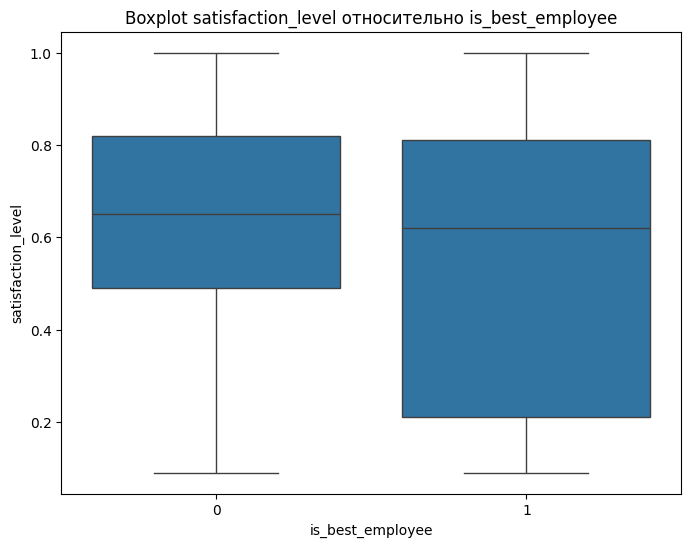

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


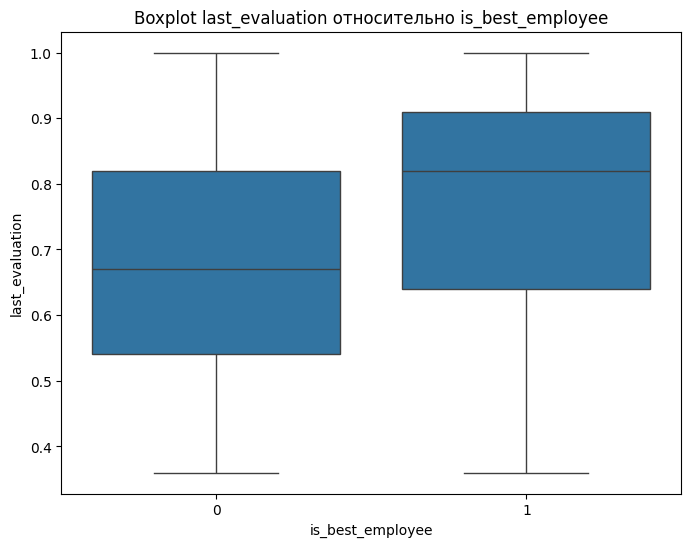

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


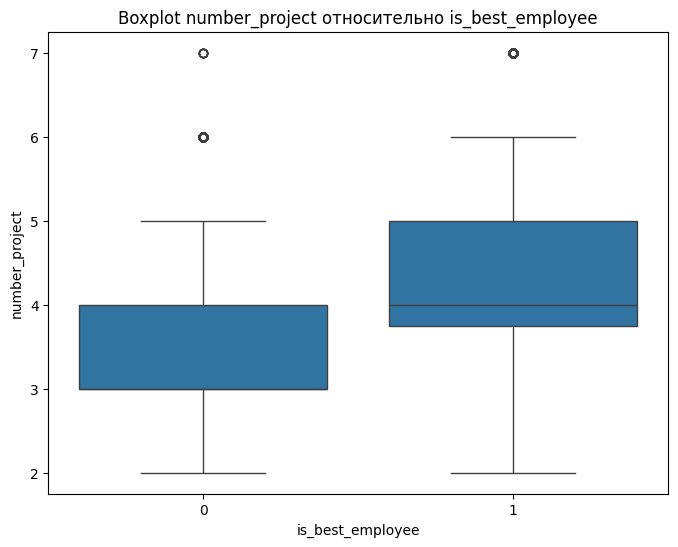

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


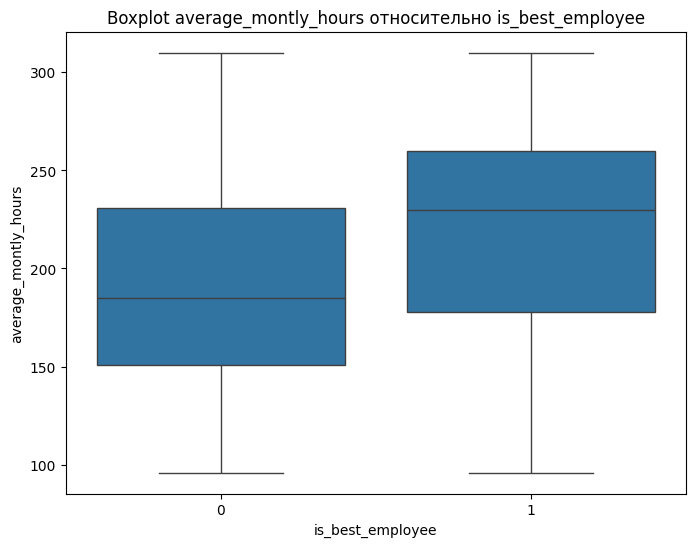

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


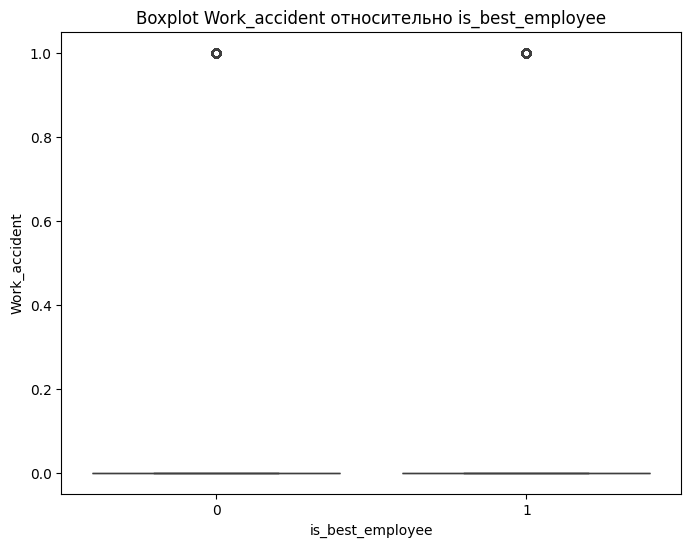

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


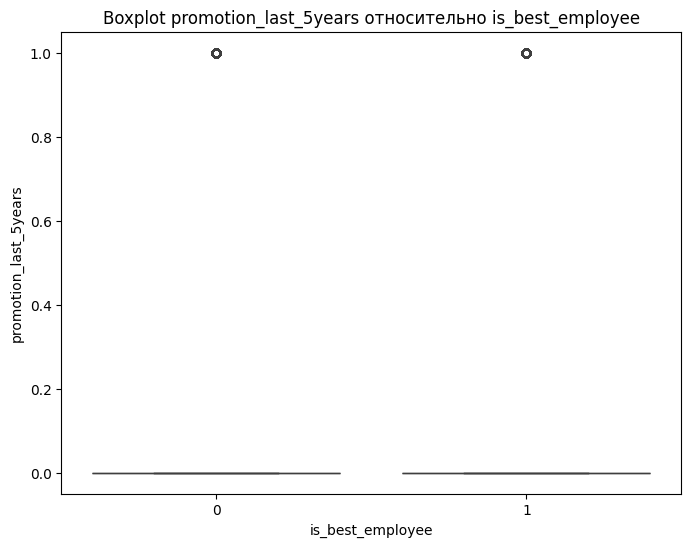

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


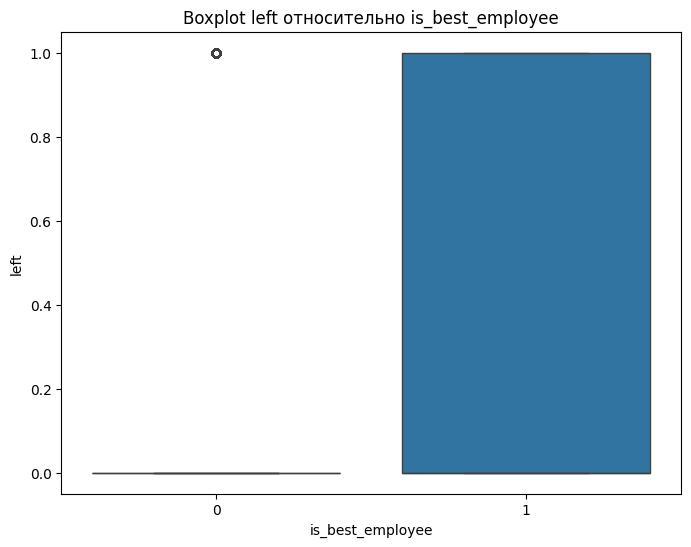

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_best_employee', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_best_employee')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

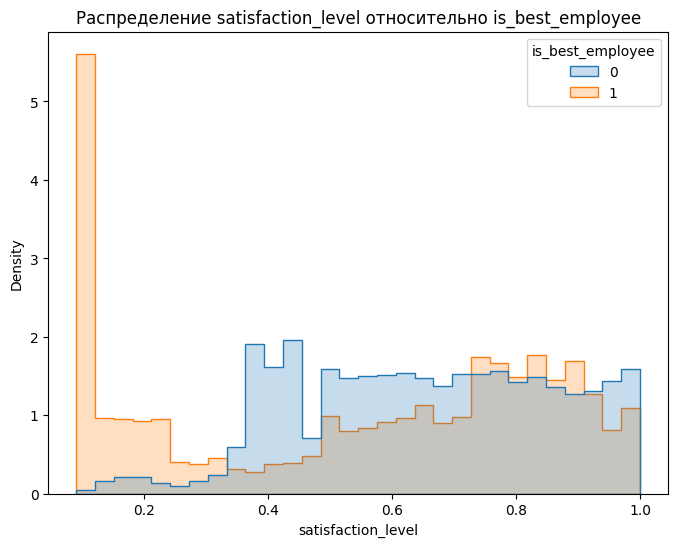

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

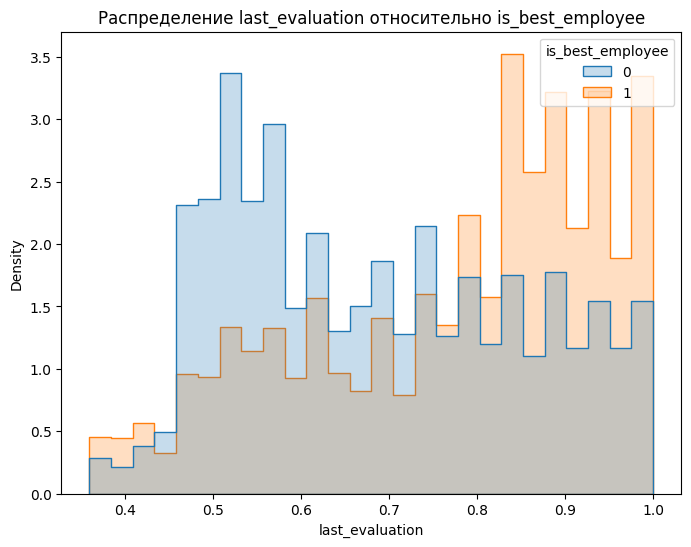

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

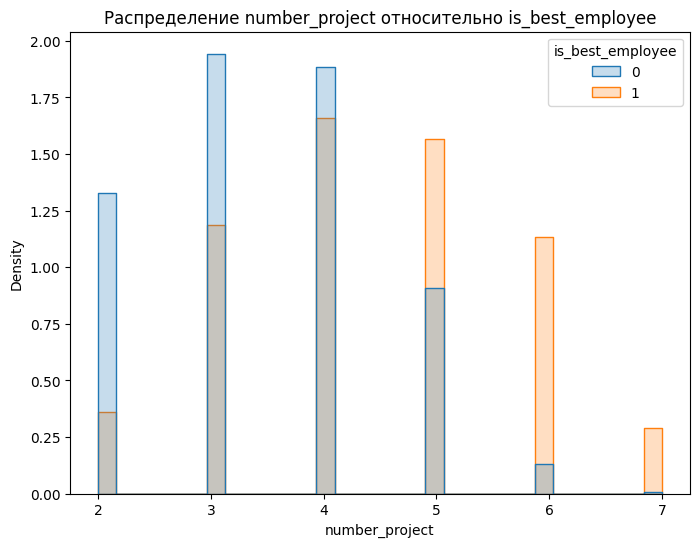

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

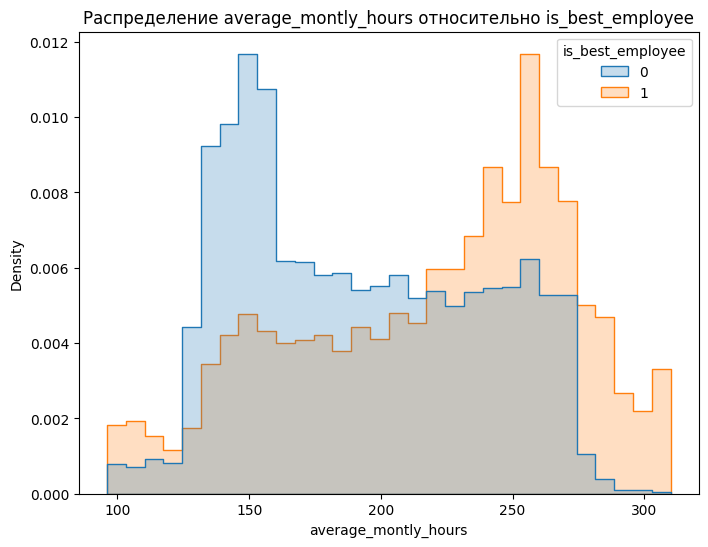

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

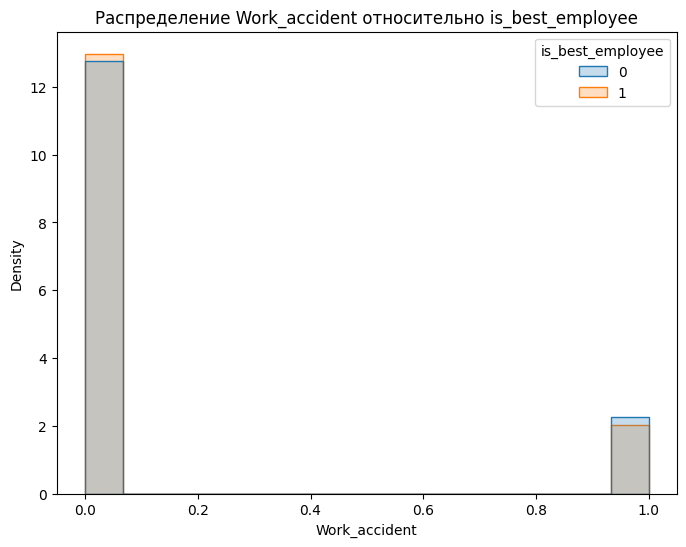

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

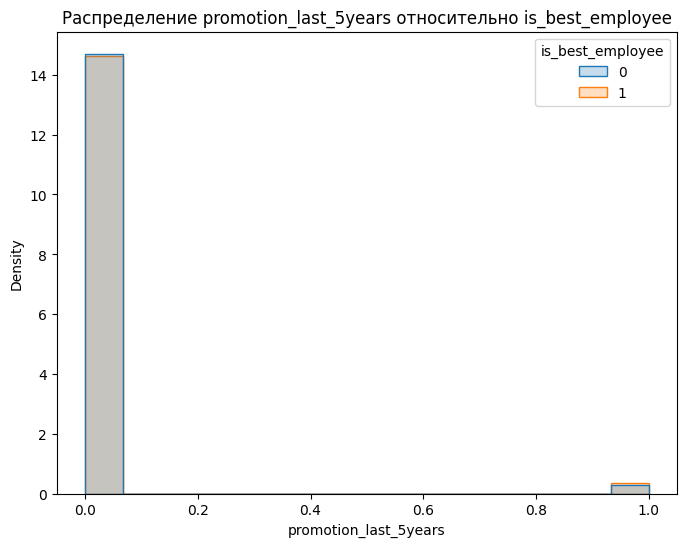

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

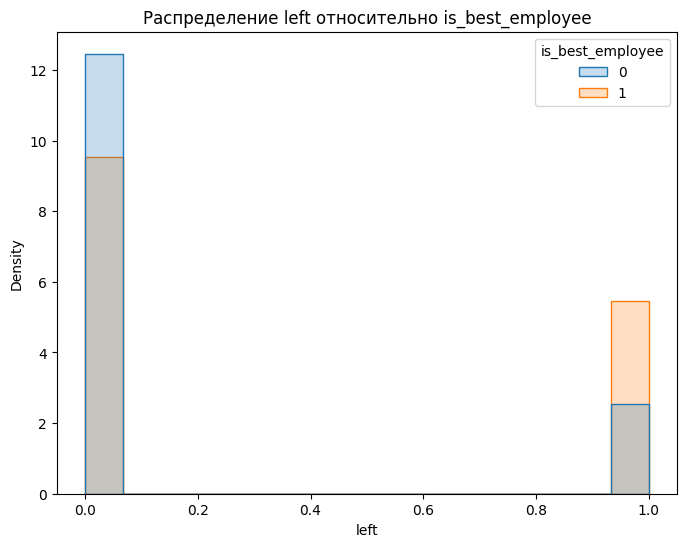

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_best_employee', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_best_employee')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_best_employee')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_best_employee')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_best_employee')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для satisfaction_level:

                   count      mean       std   min   25%   50%   75%  max
is_best_employee                                                         
0                 9687.0  0.650011  0.203151  0.09  0.49  0.65  0.82  1.0
1                 5312.0  0.545036  0.303616  0.09  0.21  0.62  0.81  1.0


Описательная статистика для last_evaluation:

                   count      mean       std   min   25%   50%   75%  max
is_best_employee                                                         
0                 9687.0  0.685088  0.164444  0.36  0.54  0.67  0.82  1.0
1                 5312.0  0.772658  0.168722  0.36  0.64  0.82  0.91  1.0


Описательная статистика для number_project:

                   count      mean       std  min   25%  50%  75%  max
is_best_employee                                                      
0                 9687.0  3.448230  1.051031  2.0  3.00  3.0  4.0  7.0
1                 5312.0  4.450113  1.275671  2.0  

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


department                     salary                  
                      count unique    top  freq  count unique  top  freq
is_best_employee                                                        
0                      9687     10  sales  2670   9687      3  low  4732
1                      5312     10  sales  1470   5312      3  low  2584

### Подробное описание переменных:

#### **1. Описательная статистика для satisfaction_level (Уровень удовлетворенности):**
- **Count**: Количество наблюдений для каждой группы — 9687 для сотрудников, не являющихся "лучшими сотрудниками", и 5312 для тех, кто является "лучшими сотрудниками".
- **Mean**: Средний уровень удовлетворенности ниже у лучших сотрудников (0.545) по сравнению с другими (0.65).
- **Std (Стандартное отклонение)**: Лучшие сотрудники имеют большее разброс удовлетворенности (0.303) по сравнению с остальными (0.203).
- **Min и Max**: Минимальные и максимальные значения одинаковы для обеих групп (от 0.09 до 1.0).
- **25%, 50% (Медиана), 75%**: У лучших сотрудников распределение больше сдвинуто к нижним значениям удовлетворенности (25% = 0.21, медиана = 0.62), тогда как у остальных оно сосредоточено выше (медиана = 0.65).

#### **2. Описательная статистика для last_evaluation (Последняя оценка):**
- **Mean**: Лучшие сотрудники имеют более высокую среднюю оценку (0.773), чем остальные (0.685).
- **Std**: Стандартное отклонение почти одинаково для обеих групп (около 0.16-0.17), что говорит о схожем разбросе оценок.
- **Min и Max**: Минимальные значения одинаковы для обеих групп (0.36), но максимальные также одинаковы (1.0).
- **25%, 50%, 75%**: Лучшие сотрудники в 25% случаев имеют более высокие оценки (0.64) по сравнению с остальными (0.54).

#### **3. Описательная статистика для number_project (Количество проектов):**
- **Mean**: Лучшие сотрудники в среднем участвуют в большем количестве проектов (4.45), чем остальные сотрудники (3.45).
- **Std**: Стандартное отклонение показывает, что разброс по количеству проектов выше у лучших сотрудников (1.28 против 1.05).
- **Min и Max**: Оба группы начинают с двух проектов, но максимальное количество проектов одинаково для обеих групп (7.0).
- **25%, 50%, 75%**: В 75% случаев лучшие сотрудники выполняют больше проектов (от 5 и выше) по сравнению с остальными (4 проекта).

#### **4. Описательная статистика для average_montly_hours (Среднее количество рабочих часов в месяц):**
- **Mean**: Лучшие сотрудники работают в среднем больше (219 часов), чем другие (191 час).
- **Std**: Стандартное отклонение выше у лучших сотрудников (52.13 против 45.78), что свидетельствует о большей вариативности рабочих часов среди лучших сотрудников.
- **Min и Max**: Минимальное значение одинаково (96 часов), но 75-й перцентиль и максимальное значение показывают, что лучшие сотрудники работают больше (260 часов против 231).
  
#### **5. Описательная статистика для Work_accident (Наличие рабочего несчастного случая):**
- **Mean**: Процент сотрудников с несчастными случаями не сильно различается (0.15 у остальных сотрудников против 0.13 у лучших).
- **Std**: Стандартное отклонение почти одинаково, что свидетельствует о схожем распределении рабочих инцидентов.

#### **6. Описательная статистика для promotion_last_5years (Повышение за последние 5 лет):**
- **Mean**: Процент сотрудников, получивших повышение, немного выше среди лучших сотрудников (0.025) по сравнению с остальными (0.019).
- **Std**: Стандартное отклонение схожее (около 0.14-0.16), что говорит о небольшом количестве сотрудников с повышениями.

#### **7. Описательная статистика для left (Увольнения):**
- **Mean**: Процент увольнений выше среди лучших сотрудников (0.364) по сравнению с остальными (0.169).
- **Std**: Стандартное отклонение значительно выше среди лучших сотрудников, что говорит о большей доле увольнений среди этой группы.

### Категориальные переменные:

#### **department (Отдел):**
- **Count и Unique**: В обоих группах 10 уникальных отделов.
- **Top**: Наиболее распространенный отдел — отдел продаж («sales») у обеих групп.
- **Freq**: В отделе продаж работает больше сотрудников среди обычных сотрудников (2670), чем среди лучших сотрудников (1470).

#### **salary (Зарплата):**
- **Count и Unique**: В обеих группах по три уникальных уровня зарплаты.
- **Top**: Самая распространенная зарплата — низкий уровень («low») у обеих групп.
- **Freq**: Процент сотрудников с низкой зарплатой выше у обычных сотрудников (4732), чем у лучших (2584).

### Выводы:
1. **Уровень удовлетворенности** у лучших сотрудников ниже по сравнению с остальными, что может свидетельствовать о более высоких ожиданиях или повышенных нагрузках.
2. **Последняя оценка производительности** у лучших сотрудников выше, что подтверждает их выдающиеся достижения.
3. **Количество проектов** у лучших сотрудников выше, что может свидетельствовать о более высокой активности и ответственности.
4. **Среднее количество рабочих часов** также выше у лучших сотрудников, что говорит о том, что они работают больше, возможно, из-за высокой нагрузки.
5. **Частота несчастных случаев на работе** немного ниже среди лучших сотрудников, что может говорить о более осторожном или ответственном подходе к работе.
6. **Повышение за последние 5 лет** наблюдается чуть чаще у лучших сотрудников, что может отражать их профессиональный рост.
7. **Увольнения** среди лучших сотрудников происходят чаще, что может свидетельствовать о выгорании или желании сменить работу из-за больших нагрузок.
8. **В отделе продаж и на низкой зарплате** находится наибольшая доля сотрудников в обеих группах, что может говорить о необходимости пересмотра условий труда для удержания лучших сотрудников.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [10]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:


### Основные корреляции:

#### **1. satisfaction_level (Уровень удовлетворенности):**
- **Корреляция с left (Уход с работы)**: (-0.388) — **умеренно сильная отрицательная корреляция**. Сотрудники с низким уровнем удовлетворенности чаще покидают компанию. Это важный признак для прогнозирования увольнений.
- **Корреляция с is_the_best_employee**: (-0.202) — **слабая отрицательная корреляция**. Лучшие сотрудники, как правило, менее удовлетворены. Это может быть связано с повышенной нагрузкой или ожиданиями.
  
#### **2. last_evaluation (Последняя оценка производительности):**
- **Корреляция с number_project (Количество проектов)**: (0.349) — **умеренная положительная корреляция**. Сотрудники с высокой оценкой, как правило, участвуют в большем количестве проектов.
- **Корреляция с average_montly_hours (Средние рабочие часы в месяц)**: (0.340) — **умеренная положительная корреляция**. Более высокие оценки производительности часто связаны с большими затратами времени на работу.
- **Корреляция с is_the_best_employee**: (0.245) — **умеренная положительная корреляция**. Лучшие сотрудники получают более высокие оценки производительности, что логично, поскольку их успехи оцениваются выше.
  
#### **3. number_project (Количество проектов):**
- **Корреляция с average_montly_hours**: (0.417) — **умеренная положительная корреляция**. Сотрудники, работающие над большим количеством проектов, тратят больше времени на работу.
- **Корреляция с is_the_best_employee**: (0.389) — **умеренная положительная корреляция**. Лучшие сотрудники участвуют в большем количестве проектов, что говорит об их активности и ответственности.
  
#### **4. average_montly_hours (Средние рабочие часы в месяц):**
- **Корреляция с is_the_best_employee**: (0.268) — **умеренная положительная корреляция**. Лучшие сотрудники работают больше часов, что свидетельствует о повышенной трудовой нагрузке и вовлеченности в рабочие процессы.
  
#### **5. time_spend_company (Стаж работы в компании):**
- **Корреляция с is_the_best_employee**: (0.771) — **сильная положительная корреляция**. Сотрудники с долгим стажем работы с высокой вероятностью попадают в категорию лучших сотрудников. Это может говорить о том, что лучшие сотрудники остаются в компании дольше и продвигаются по карьерной лестнице.
- **Корреляция с left (Уход с работы)**: (0.145) — **слабая положительная корреляция**. Уход из компании связан с более долгим стажем работы, что может говорить о выгорании или поиске новых возможностей после долгого времени в компании.
  
#### **6. Work_accident (Несчастный случай на работе):**
- **Корреляция с left**: (-0.155) — **слабая отрицательная корреляция**. Сотрудники, которые попали в несчастный случай, реже покидают компанию, что может быть связано с компенсациями или другими факторами.
  
#### **7. left (Уход с работы):**
- **Корреляция с is_the_best_employee**: (0.218) — **слабая положительная корреляция**. Лучшие сотрудники чаще покидают компанию. Это важный индикатор, так как даже лучшие сотрудники могут решать покинуть организацию, возможно, из-за выгорания или желания карьерного роста в другом месте.

### Основные выводы:
- **Уровень удовлетворенности** тесно связан с увольнениями. Низкий уровень удовлетворенности — значимый предиктор того, что сотрудник покинет компанию.
- **Лучшие сотрудники** работают больше часов, участвуют в большем количестве проектов, имеют более высокие оценки и, как правило, работают в компании дольше. Однако они также могут быть менее удовлетворены и чаще покидают компанию.
- **Уход из компании** также связан с долгим временем работы в ней, что может указывать на выгорание или неудовлетворенность, особенно среди лучших сотрудников.


### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['number_project', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']


In [28]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,average_montly_hours_97,average_montly_hours_98,average_montly_hours_99,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.38,0.53,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.80,0.86,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.11,0.88,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,True
3,0.72,0.87,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,0.37,0.52,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.37,0.48,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.37,0.53,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.11,0.96,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [29]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['satisfaction_level', 'last_evaluation']


In [30]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [31]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,average_montly_hours_97,average_montly_hours_98,average_montly_hours_99,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.318681,0.265625,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.021978,0.812500,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,True
3,0.692308,0.796875,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,0.307692,0.250000,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [32]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [34]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.7847
Точность на тестовой выборке: 0.7790

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1938
           1       0.79      0.51      0.62      1062

    accuracy                           0.78      3000
   macro avg       0.78      0.72      0.73      3000
weighted avg       0.78      0.78      0.76      3000



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [35]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                      Feature  Coefficient
5            number_project_6     3.117860
6            number_project_7     3.021184
4            number_project_5     2.230955
12   average_montly_hours_102     2.099395
196  average_montly_hours_286     1.933927
..                        ...          ...
177  average_montly_hours_267     0.021026
158  average_montly_hours_248    -0.020073
203  average_montly_hours_293    -0.008153
104  average_montly_hours_194     0.005138
80   average_montly_hours_170    -0.004946

[235 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [37]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7735
Отклонение точности: 0.0952


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

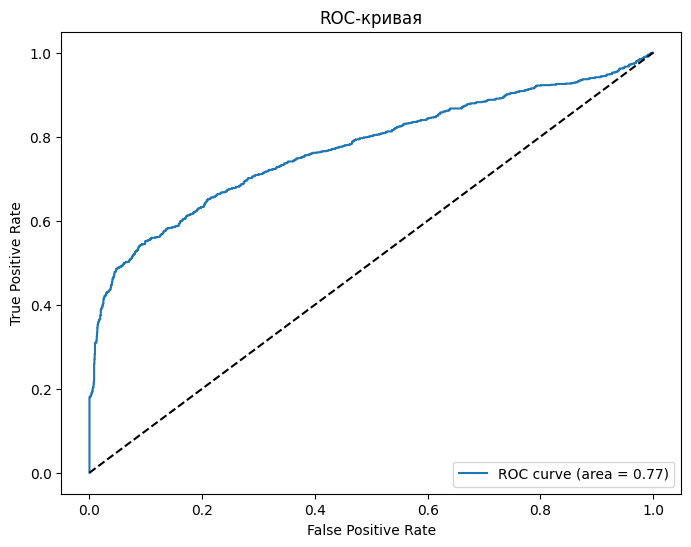

In [39]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---